
# Project: Investigate a Dataset - [Amazon_product_data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitation</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


#### Dataset Overview
<ul>
<li>This dataset contains information about 10,000 movies collected from the Movie Database (TMDb).</li>
<li>The dataset includes user ratings and revenue information for each movie.</li>
<li>Certain columns, such as 'cast' and 'genres', contain multiple values separated by pipe (|) characters. These columns likely list the cast and genres associated with each movie.</li>
<li>The 'cast' column may contain odd characters, and it's mentioned that there is no need to clean them.</li>
</ul>

#### Columns in the Dataset:
1. `product_id`: A unique identifier for each product.
2. `product_name`: Name of the Product.
3. `category`: Category of the Product.
4. `discounted_price`: Discounted Price of the Product.
5. `actual_price`: Actual Price of the Product.
6. `discount_percentage`: Percentage of Discount for the Product.
7. `rating`: Rating of the Product.
8. `rating_count`: Number of people who voted for the Amazon rating.
9. `about_product`: Description about the Product.
10. `user_id`: ID of the user who wrote review for the Product.
11. `user_name`: Name of the user who wrote review for the Product.
12. `review_id`: ID of the user review.
13. `review_title`: Short review.
14. `review_content`: Long review.
15. `img_link`: Image Link of the Product.
16. `product_link`: Official Website Link of the Product

<a id='question'></a>
## Question(s) for Analysis
1. Does the higher discount lead to more positive ratings? 

This question involves the popularity of different movie genres over time. I will analyze the trends in genre and identify which genres dominate in each year.

2. What is the average rating across different product categories?

I will analyze the factors that are correlated with high movie revenues. I will analyze the relationships between various independant variables (budget, genres, directors, release years, adjusted revenue, runtime, popularity, vote count) and the dependent variable (revenue) to understand what properties are associated with movies that have high revenues.

3. What is the relationship between product category and discount percentage?

4. Do products with more reviews have higher or lower average ratings?

In [60]:
# import numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import nltk
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.1

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# load datasets from tmdb-movies.csv file
df = pd.read_csv("data/amazon.csv")

In [4]:
#Create a temp dataset named df2
df2 = df.copy()

In [5]:
# view the first 5 rows of the dataset
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
#view dimensions of dataset
df.shape

(1465, 16)

The number of samples in the dataset is 1465, The number of columns in the dataset is 16

In [7]:
#explore the dataset, checking for the missing value of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

There is no null data in this dataset.

In [8]:
#view the datatype of each column
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [9]:
#Show how many unique values are there in each columns.
df.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

In [10]:
#check whether the dataset has duplicated row
sum(df.duplicated())

0

There is 0 duplicate row in the dataset

In [11]:
#show the null rows in each column
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [12]:
#view the overall information of the dataset:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [13]:
df.rating.value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

`Rating` column has 1 row that contain '|' symbol

In [14]:
df2[df2['rating'] =='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...



### Data Cleaning
 

### Drop extraneous columns
Columns to Drop: `img_link` , `user_name` , `user_id`

In [15]:
#drop columns from the dataset
df.drop(['img_link','user_name','user_id'], inplace=True, axis=1)

In [16]:
#confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   review_id            1465 non-null   object
 10  review_title         1465 non-null   object
 11  review_content       1465 non-null   object
 12  product_link         1465 non-null   object
dtypes: object(13)
memory usage: 148.9+ KB


### Dedupe Data

In [17]:
#print number of duplicates to confirm dedupe - should be 0
print(df.duplicated().sum())

0


### Drop Rows with Missing Values

In [18]:
# view missing value count for each property
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

In [19]:
df[df['rating_count'].isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://www.amazon.in/REDTECH-Lightning-Certif...


I go to product link to check and notice that product_id: B0B94JPY2N has 4.0 rating and 58 rating_count. 
Product_id B0BQRJ3C47 hasn't existed in amazon so I will drop it.

In [20]:
df[df['rating_count'].isnull()].product_link

282    https://www.amazon.in/Amazon-Brand-Charging-Su...
324    https://www.amazon.in/REDTECH-Lightning-Certif...
Name: product_link, dtype: object

In [21]:
df.loc[df['product_id'] == 'B0B94JPY2N', 'rating_count'] = '58'
df.loc[df['product_id'] == 'B0B94JPY2N', 'rating'] = '4.0'

In [22]:
#drop rows with any null values in dataset
df.dropna(inplace=True)

In [23]:
# checks if any of columns in the dataset have null values - should print False
df.isnull().sum().any()

False

In [24]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

### Change Data Type

Create a float_change function to automatically change float type to each column.

In [25]:
def float_change(df,column_name):
    # removes any non-numeric characters (except for the decimal point)
    df[column_name] = df[column_name].str.replace(r'[^0-9.]', '', regex=True)
    
    # convert string to float for actual_price column
    df[column_name] = df[column_name].astype(float)

In [26]:
float_change(df,'discounted_price')

In [27]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price            object
discount_percentage     object
rating                  object
rating_count            object
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

In [28]:
# convert string to float for actual_price column
float_change(df,'actual_price')

In [29]:
# check data type for revenue column and budget column
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                  object
rating_count            object
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

In [30]:
float_change(df,"rating_count")

In [31]:
# check data type for revenue column and budget column
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                  object
rating_count           float64
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

### Fixing `rating` Column

In [32]:
df[df['rating'] =='|']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16%,|,992.0,No Installation is provided for this product|1...,"R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


I checked the product_linke of "B08L12N5H1", the rating is 3.9, so I will fill the rating at 3.9

In [33]:
df.loc[df['product_id'] == 'B08L12N5H1', 'rating'] = '3.9'

In [34]:
float_change(df,"rating")

In [35]:
# check data type for revenue column and budget column
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                 float64
rating_count           float64
about_product           object
review_id               object
review_title            object
review_content          object
product_link            object
dtype: object

### Fixing `discount_percentage` Column

In [36]:
float_change(df,"discount_percentage")

In [37]:
df['discount_percentage'] = df['discount_percentage'].apply(lambda x: x/100)

In [38]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://www.amazon.in/Portronics-Konnect-POR-1...


In [39]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
review_id              0
review_title           0
review_content         0
product_link           0
dtype: int64

Create a split_and_expand function to automatically split and expand into separate rows.

In [40]:
# Create and split_and_expand function to automatically split and expand into separate rows.
def split_and_expand(df,column_name,fill_value='NaN'):
    #split the specified column on the delimiter '|'
    split_column = df[column_name].str.split('|', expand=True)
    
    # Rename the columns based on the number of split elements
    split_column.columns = [f'category_{i + 1}' for i in range(split_column.shape[1])]
    
    # Fill NaN values with the specified fill_value
    split_column = split_column.fillna(fill_value)
    
    #drop the old column
    df = df.drop(column_name, axis=1)
    
    #join the new column
    df= df.join(split_column)
    
    return df

### Fixing `category` Column

Call split_and_expand function to fix genres columns

In [41]:
#Call split_and_expand function and put it in new dataframe called df_genres
split_category_df = split_and_expand(df, 'category')

In [42]:
split_category_df.shape

(1464, 19)

In [43]:
#Confirm the new genre column
split_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1464
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   discounted_price     1464 non-null   float64
 3   actual_price         1464 non-null   float64
 4   discount_percentage  1464 non-null   float64
 5   rating               1464 non-null   float64
 6   rating_count         1464 non-null   float64
 7   about_product        1464 non-null   object 
 8   review_id            1464 non-null   object 
 9   review_title         1464 non-null   object 
 10  review_content       1464 non-null   object 
 11  product_link         1464 non-null   object 
 12  category_1           1464 non-null   object 
 13  category_2           1464 non-null   object 
 14  category_3           1464 non-null   object 
 15  category_4           1464 non-null   o

In [44]:
split_category_df.head(100)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_id,review_title,review_content,product_link,category_1,category_2,category_3,category_4,category_5,category_6,category_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,B093QCY6YJ,ZEBRONICS ZEB-USB150WF1 WiFi USB Mini Adapter ...,290.0,349.0,0.17,3.7,1977.0,Supports 150Mbps Wireless data transmission ra...,"R32XZQTB1BP0J8,R2NHRHTL743ZMA,R10FKRAEORI9L,RE...","Good product,Best produced,Working well as of ...","Working very nice ok,Sahi paise ke hisab se sa...",https://www.amazon.in/ZEBRONICS-ZEB-USB150WF1-...,Computers&Accessories,NetworkingDevices,NetworkAdapters,WirelessUSBAdapters,NaN,NaN,NaN
96,B093ZNQZ2Y,LOHAYA Remote Compatible for Mi Smart LED TV 4...,249.0,799.0,0.69,3.8,1079.0,Compatible with MI Smart TV 4A 32 inch LED TV ...,"R1MTTFP4GWHWC8,R2A03DS956BN4T,R21TRTA1VGGCD3,R...","Very hard to use,Good,Required Replacement but...","Not value for money.. not satisfied,Good,Requi...",https://www.amazon.in/LOHAYA-Remote-Compatible...,Electronics,"HomeTheater,TV&Video",Accessories,RemoteControls,NaN,NaN,NaN
97,B08LKS3LSP,"Gilary Multi Charging Cable, 3 in 1 Nylon Brai...",345.0,999.0,0.65,3.7,1097.0,The cable comes with 3 Different pins allowing...,"R168J8VQSY0OH5,R18LTVF8A76SR3,RVRLO0A6SRBIU,R3...","Product is nice,Decent cable,It charges all th...","Product is nice,Decent charging cable for the...",https://www.amazon.in/Gilary-Charging-Braided-...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
98,B00V4BGDKU,TP-Link UE300 USB 3.0 to RJ45 Gigabit Ethernet...,1099.0,1899.0,0.42,4.5,22420.0,Fastest USB 3.0 and Gigabit solution ensure hi...,"R30SWI8U6K7PDR,R2K3WL7JFGLDI,R2WXWZRPAKQ1GP,R2...",

## Sentiment Analysis

Function to get sentiment

In [45]:
# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    
    # returns a polarity score between -1 (negative) and 1 (positive)
    return analysis.sentiment.polarity

In [46]:
# Applying sentiment analysis on the 'review_content' column
split_category_df['textblob_sentiment_score'] = split_category_df['review_content'].apply(get_sentiment)

In [47]:
# Categorizing the sentiment as Positive, Neutral, or Negative
split_category_df['text_blob_sentiment'] = split_category_df['textblob_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [48]:
split_category_df['text_blob_sentiment'].value_counts()

Positive    1437
Negative      26
Neutral        1
Name: text_blob_sentiment, dtype: int64

In [49]:
# Download VADER lexicon (only the first time)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/haucongle/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [50]:
# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [51]:
# Function to get sentiment
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score['compound']  # compound score between -1 (negative) and 1 (positive)

In [52]:
# Applying sentiment analysis
split_category_df['vader_sentiment_score'] = split_category_df['review_content'].apply(get_vader_sentiment)
split_category_df['vader_sentiment'] = split_category_df['vader_sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [53]:
split_category_df['vader_sentiment'].value_counts()

Positive    1381
Negative      80
Neutral        3
Name: vader_sentiment, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Is there a relationship between discount percentage and average product rating ?

In [54]:
split_category_df['discount_percentage'].describe()

count    1464.000000
mean        0.476728
std         0.216315
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

In [55]:
split_category_df['rating'].describe()

count    1464.000000
mean        4.096516
std         0.289356
min         2.000000
25%         4.000000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64

**Analysis Decision 1**: Draw histogram.

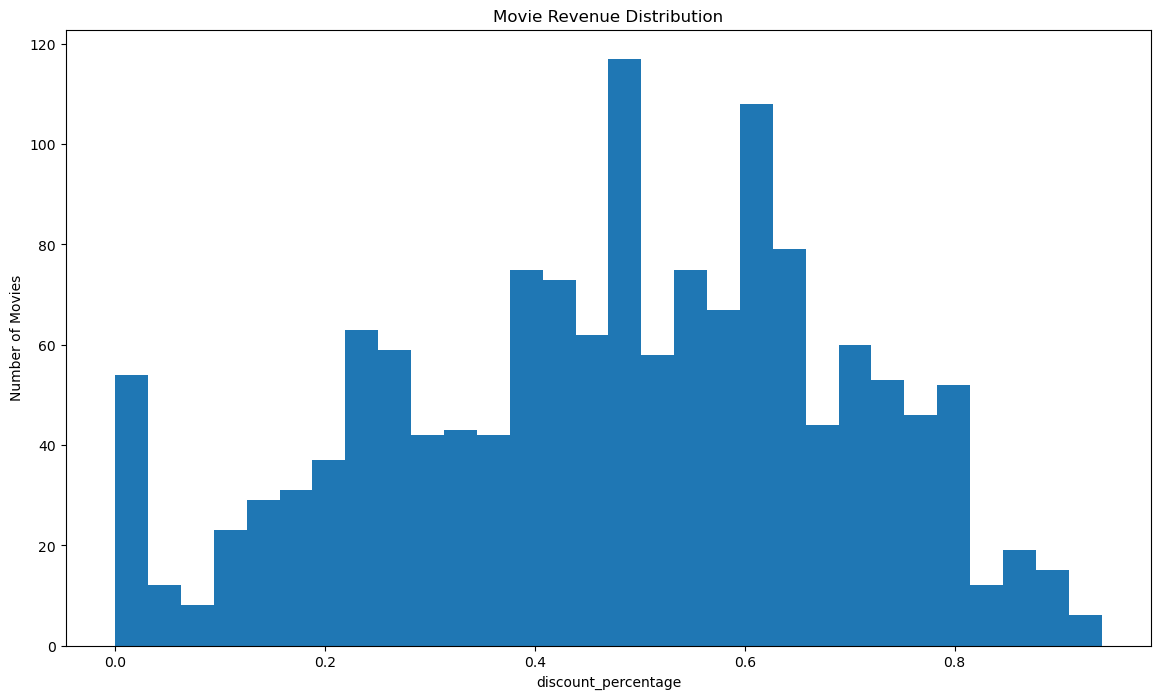

In [56]:
split_category_df['discount_percentage'].plot(kind='hist', bins=30, figsize=(14, 8), title='Movie Revenue Distribution')
plt.xlabel('discount_percentage')
plt.ylabel('Number of Movies')
plt.show()

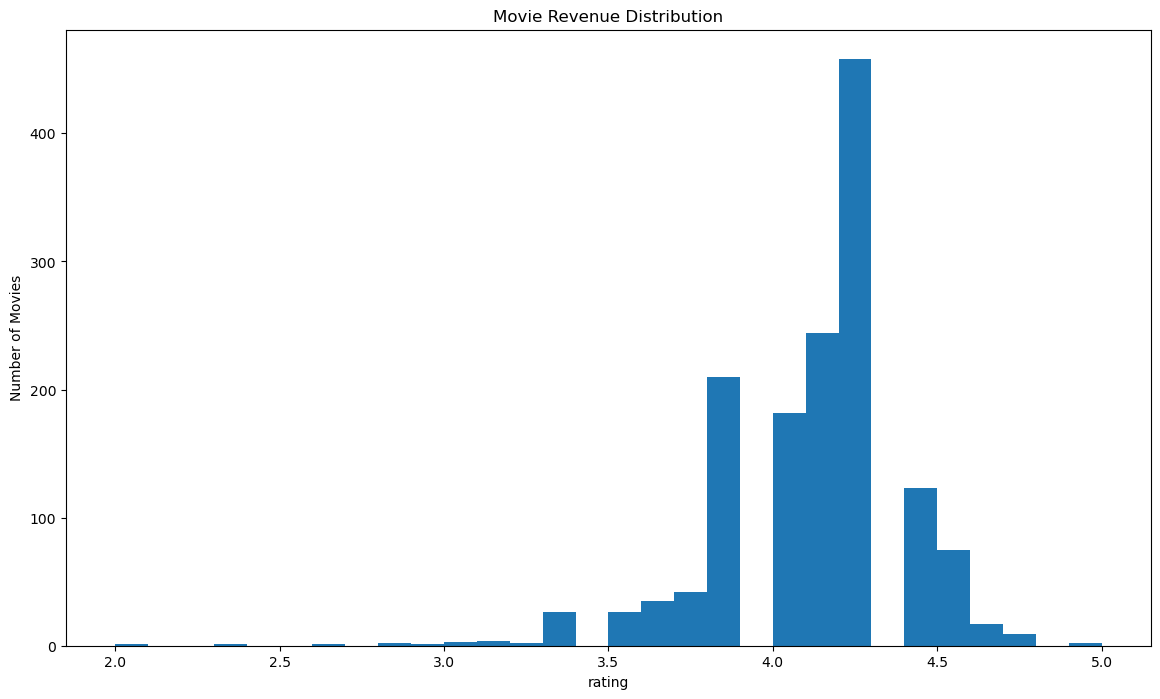

In [57]:
split_category_df['rating'].plot(kind='hist', bins=30, figsize=(14, 8), title='Movie Revenue Distribution')
plt.xlabel('rating')
plt.ylabel('Number of Movies')
plt.show()

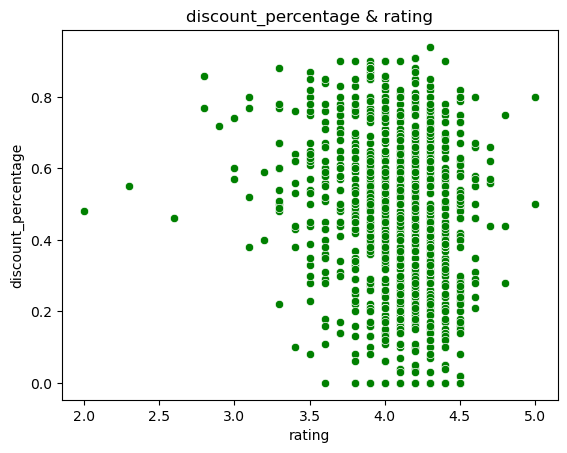

In [62]:
sns.scatterplot(x='rating',y='discount_percentage', data= split_category_df, color = "green")
plt.title("discount_percentage & rating")
plt.show()

Data Grouping: Group the data by `release_year` and `genre` fields, then calculate the count of movies for each genre in each year.

In [58]:
# group release column and genres column, then calculate the count of movies for each genres in each year.
genre_counts = df_genres.groupby(['release_year','genres']).size().reset_index(name="counts")

NameError: name 'df_genres' is not defined

In [ ]:
#view the genre_counts dataframe
genre_counts.head(20)

**Reasoning**: Counting the number of movies in each genre for each year will help understanding the distribution of movie genre over time.

**Analysis Decision 2**: Creating a Heatmap to Visualize Genre Counts Over Years

In [ ]:
# Pivot the data for visualization
year_genres = genre_counts.pivot(index='release_year', columns='genres', values='counts')

In [ ]:
#set plot dimension
plt.figure(figsize=(30,14))
# heatmap plot
sns.heatmap(year_genres, annot= True, fmt=".0f",cmap ="RdYlGn_r");

**Reasoning**: The heatmap shows the distribution of movie genres over the years. The change in color intensity reprents the count of movies in each genre each year. Heatmap will provide a clear overview of how the popularity of different genres changes overtimes.

**Summary**: 
- Based on Decision Analysis 1 and 2, the popularity of movies increases year by year, for example the Action Genre in the 1960s only produced 8 movies, increasing over time and having 107 movies in 2015.
- The heatmap showed that there are some pretty popular genres: Action, Comedy, Drama, and Thriller.

**Analysis Decision 3**: Identifying the Most Popular Genre Each Year.

In [ ]:
# Use idxmax() function to get the index of most popularity genre in each year, and put it in new array named popularity_index
popularity_index =genre_counts.groupby('release_year')['counts'].idxmax()

In [ ]:
# Use loc function to extract row of the most popular genre in each year.
most_popular_genres = genre_counts.loc[popularity_index].reset_index(drop=True)

Print the most_popular_genres dataframe

In [ ]:
#Print the most_popular_genres dataframe
print(most_popular_genres)

**Reasoning**: This will help to find the most popular genre for each year. The goal is to understand how genre popularity evolves over time and determine the dominant genre for each year.

**Analysis Decision 4**: Create a stacked bar chart to visualize the genre popularity over time.

In [ ]:
# Pivot the data for visualization
genre_pivot = most_popular_genres.pivot(index='release_year', columns='genres', values='counts')

# Create a stacked bar chart to visualize genre popularity over time
genre_pivot.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Genre Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre')
plt.show()

**Reasoning**: Visualize how the popularity of different genres changes over time. It also allows to see the dominate genre each year and how it compare to other.

**Summary**:
- The "Drama" genre consistently dominates as the most popular genres in most years.
- There was a time when "Comedy" genre took place as the most popular (1985-2003).
- After 2005s, the popularity of "Drama" genre was significantly higher than in previous years.

**Analysis Decision 5**: Counting the Total Number of Each Dominated Genre.

In [ ]:
# Use value_counts function to show the total number of each dominated genre
most_popular_genres['genres'].value_counts()

**Reasoning**: This step help to understand which genre has dominated the most.

**Analysis Decision 6**: Creating a Pie Chart to Visualize Most Popular Genres

In [ ]:
# Plot the pie chart for the most popular genres over the years.
genre_labels=["Drama", "Comedy"]
plt.figure(figsize=(8, 8))
plt.pie(most_popular_genres['genres'].value_counts(), labels= genre_labels)
plt.title('Most Popular Genres')
plt.legend()
plt.show()

**Reasoning**: The pie chart provides a concise visualization of the most popular genres over the years. This is helpfull for quickly identifying the dominant genres.

**Summary**: We can easily see that there are two dominant genres: Drama and Comedy. The "Drama"'s ratio is almost 80%, meaning it dominates significantly.

### Research Question 2:  What kinds of properties are associated with movies that have high revenue

**Analysis Decision 1**: Filter Out Movies with Zero Revenues and Budgets.

In [ ]:
#Create a new dataframe with the revenue and budget > 0
df_revenue = df.query('revenue > 0 & budget > 0')

**Reasoning**: To ensure that we work with clean dataset by removing out zero revenues and budgets.

**Analysis Decision 2**: Identifying Top Revenue Movies

In [ ]:
# Apply query function to filter the rows which are higher than the average revenue.
top_revenue = df_revenue.query('revenue > revenue.mean()')
top_revenue.describe()

Reasoning: By selecting movies with revenus higher than the average revenue, we can identify movies that have high revenue.

**Analysis Decision 3**: Movie Revenue Distribution:

In [ ]:
# Plot the histogram chart to show the distribution of revenue.
df_revenue['revenue'].plot(kind='hist', bins=30, figsize=(14, 8), title='Movie Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Number of Movies')
plt.show()

**Reasoning**: the histogram will visualize the distribution of movie revenues.

**Summary**: Based on Decision Analysis 2 & 3, we have:
- The number of items before filtering rows with higher revenue is 10866, after filtering is 1107. This means that the average number of higher revenue is relatively low.
- The histogram is right skewed, it supports the result that there is a relatively small number of movies that achieve exceptionally hight revenue.

**Analysis Decision 4**: Top Directors by Average Revenue

In [ ]:
# Calculate the average revenue for each director
director_revenue = df_director.groupby('director').revenue.mean().reset_index()

In [ ]:
#sort the director_revenue in descending order:
director_revenue_sorted = director_revenue.sort_values('revenue', ascending=False)

In [ ]:
# get first 10 director
director = director_revenue_sorted['director'][:10]

In [ ]:
# get first 10 revenue
revenue = director_revenue_sorted['revenue'][:10]

In [ ]:
# Plot the top 10 directors with the highest mean revenue.
plt.figure(figsize=(14, 8))
plt.bar(director, revenue)
plt.xlabel('Director')
plt.ylabel('Mean Revenue')
plt.title('Top Directors by Mean Revenue')
plt.show()

**Reasoning**: By this analysis, we can identify the top 10 director who have consistently produced high-revenue movies.

**Summary**: The bar chart shows the tio 10 directos with highest mean revenue, indicating their influence on movie revenue.

**Analysis Decision5**: Top Genres by Average Revenue

In [ ]:
# Group data by genre and calculate the mean revenue for each director
genre_revenue = df_genres.groupby('genres').revenue.mean().reset_index()

In [ ]:
#sort the director_revenue in descending order:
genre_revenue = genre_revenue.sort_values(by='revenue', ascending=False)

In [ ]:
# Get the top 10 genres
genre = genre_revenue['genres'][:10]

In [ ]:
# Get the top 10 revenues
revenue = genre_revenue['revenue'][:10]

In [ ]:
# Plot the top 10 genres with the highest mean revenue.
plt.figure(figsize=(14, 8))
plt.bar(genre, revenue)
plt.xlabel('Genre')
plt.ylabel('Mean Revenue')
plt.title('Top Genres by Mean Revenue')
plt.show()

**Reasoning**: Similar to the analysis decision 4, this analysis helps identify which genres tend to generate the most revenue.

**Summary**: This bar chart shows the top 10 genres which have highest revenue, helping to know which genre have the revenue potential.

**Analysis decision 6**: Budget vs Revenue

In [ ]:
# Create a scatter plot to compare budget and revenue correlation.
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['budget'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
#Calculate the correlation number between Budget and Revenue
df_revenue['budget'].corr(df_revenue['revenue'])

**Reasoning**: This analysis will help us understand if higher budgets can lead to higher revenues.

**Summary**: Based on the scatter plot and the calculated correlation number result (0.6885264281534182), it shows the positive correlation between budgets and revenues, indicating that higher-budget movies tend to have higher revenues.

**Analysis Decision 7**: Popularity vs Revenue

In [ ]:
# Create a scatter plot to compare popularity and revenue
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['popularity'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('popularity')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
#Calculate the correlation number between Popularity and Revenue
df_revenue['popularity'].corr(df_revenue['revenue'])

**Reasoning**: This analysis will help us know whether more popular movies generate higher revenues.

**Summary**: Based on the scatter plot and the calculated correlation number result (0.6154980131970922), it shows the positive correlation between popularity and revenues, indicating that more popular movies tend to have higher revenues.

**Analysis Decision 8**:Adjusted Revenue vs Revenue

In [ ]:
# Create a scatter plot to compare adjusted revenue and revenue
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['revenue_adj'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Adjusted Revenue')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
#Calculate the correlation number between Revenue_adj and Revenue
df_revenue['revenue_adj'].corr(df_revenue['revenue'])

**Reasoning**: This analysis will help us understang the relationship between Adjusted Revenue and Revenue

**Summary**: Based on the scatter plot and the calculated correlation number result (0.9008743936142234), it shows the pretty strong positive correlation between revenue_adj and revenues, indicating that adjusted revenues are reliable measure.

**Analysis Decision 9**: Vote Count vs Revenue

In [ ]:
# Create a scatter plot to compare vote count and revenue
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['vote_count'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Correlation between Vote Count and Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
#Calculate the correlation number between vote_count and Revenue
df_revenue['vote_count'].corr(df_revenue['revenue'])

**Reasoning**: This scatter plot will help us understand whether higher audience engagement leads to higher revenues

**Summary**: Based on the scatter plot and the calculated correlation number result (0.7545462177826207), it shows the  positive correlation between vote count and revenues, suggesting that movies with more votes tend to have higher revenues.

**Analysis Decision 10**: Runtime vs Revenue

In [ ]:
# Create a scatter plot to compare runtime and revenue
plt.figure(figsize=(14, 8))
plt.scatter(df_revenue['runtime'], df_revenue['revenue'], alpha=0.5, color='b')
plt.title('Correlation between Vote Count and Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
# Calculate the correlation number between runtime and Revenue
df_revenue['runtime'].corr(df_revenue['revenue'])

**Reasoning**: This analysis helps us understand if longer or shorter movies generate higher revenues.

**Summary**: Based on the scatter plot and the calculated correlation number result (0.2507777788697942), it shows the weak positive correlation between vote count and revenues, suggesting that movie length has a limited impact on revenue.

**Analysis Decision 11**: Average Revenue over time:

In [ ]:
#Groupby the release year and then calculate the average revenue for each year.
revenue_release_year = df_revenue.groupby('release_year').revenue.mean().reset_index()

In [ ]:
# Use bar graph to visualize average revenue over time.
plt.figure(figsize=(14, 8))
plt.bar(revenue_release_year['release_year'], revenue_release_year['revenue'])
plt.xlabel('Release Year')
plt.ylabel('Mean Revenue')
plt.title('Mean Revenue over Years')
plt.show()

**Reasoning**: the calculation of average revenue for each year will show how movie revenues changed over time.

**Summary**: This bar chart shows the average revenue trend over time, we can see the movie's revenue is increasing year by year.

# <a id='conclusions'></a>
## Conclusions


Question 1: Which genres are most popular from year to year ?
- The "Drama" genre has consistently dominated in the most years (1960 to 2015).
- "Comedy" was another popular genre but didn't consistently outperform "Drama." 
- These findings provide insights into long-term genre trends in the film industry.

Question 2: What kinds of properties are associated with movies that have high revenue ?
- The distribution of movie revenues is right-skewed, so the majority of movies have low revenue.
- Some directors produce films with higher average revenues. Recognition of these directors can ensure financial strategy.
- “Adventure” and “Fantasy” are associated with higher sales. Investing in these genres can be worthwhile.
- Budget: The correlation between budget and revenue is positive. So, movies with higher budget will generate higher revenues.
- Popularity: The correlation between popularity and revenue is positive. So, the movies that are more popular with audiences will have higher revenues.
- Adjusted Revenue: The correlation between adjusted revenue and revenue is the strongest positive (~0.9), which is shows that there is a strong relationship between the two. Adjusted revenue provides a more accurate reflection of financial success over time, accounting for inflation.
- Vote Count: The correlation between vote count and revenue is also high positive. It shows that the movie with higher number of votes tend to have higher revenues.
- Runtime: The correlaton of runtime is also positive, but it is weak (~0.2). It shows that longer or shorter movie does not impact the revenue.
- In general, audience is the main factor affecting revenue.

<a id='limit'></a>
## Limitation

- This source might not represent a comprehensive and unbiased sample of all movies. It is possible that some genres of movies are not represented.
- The correlation does not imply causation. It will need more experiments and statistical analyses. The findings in this analysis provide associations but should not be interpreted as causal relationships.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])